In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

In [2]:
data = pd.read_csv('E:/Vaibhav/Study_CS/IIT PG/cr_loan_w2.csv')
data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


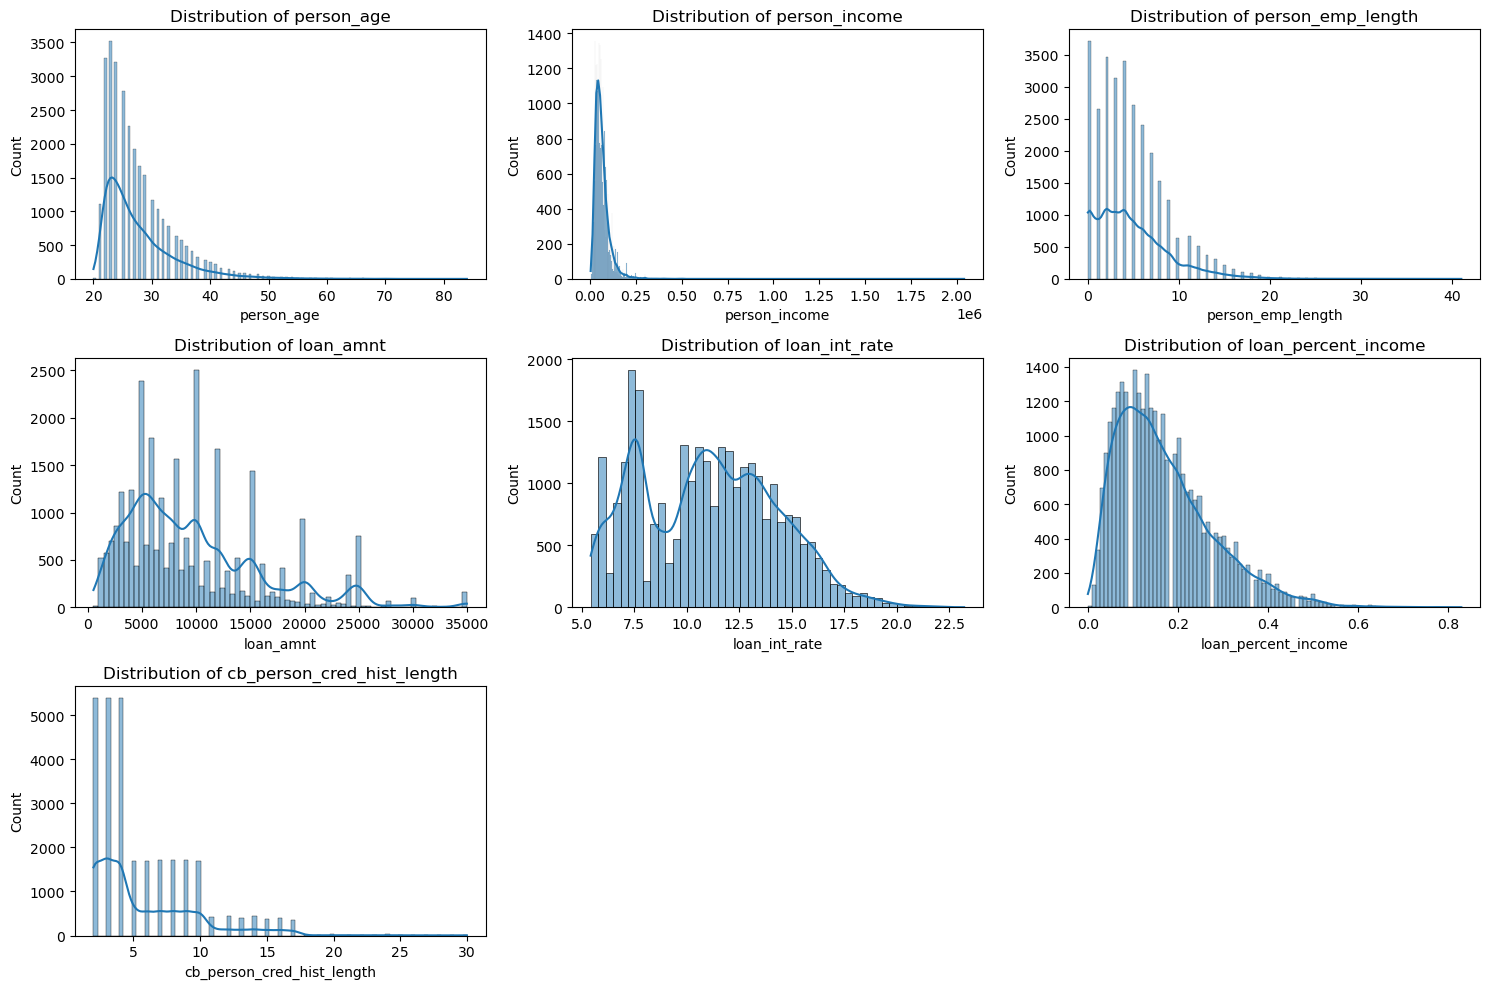

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of numerical features
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

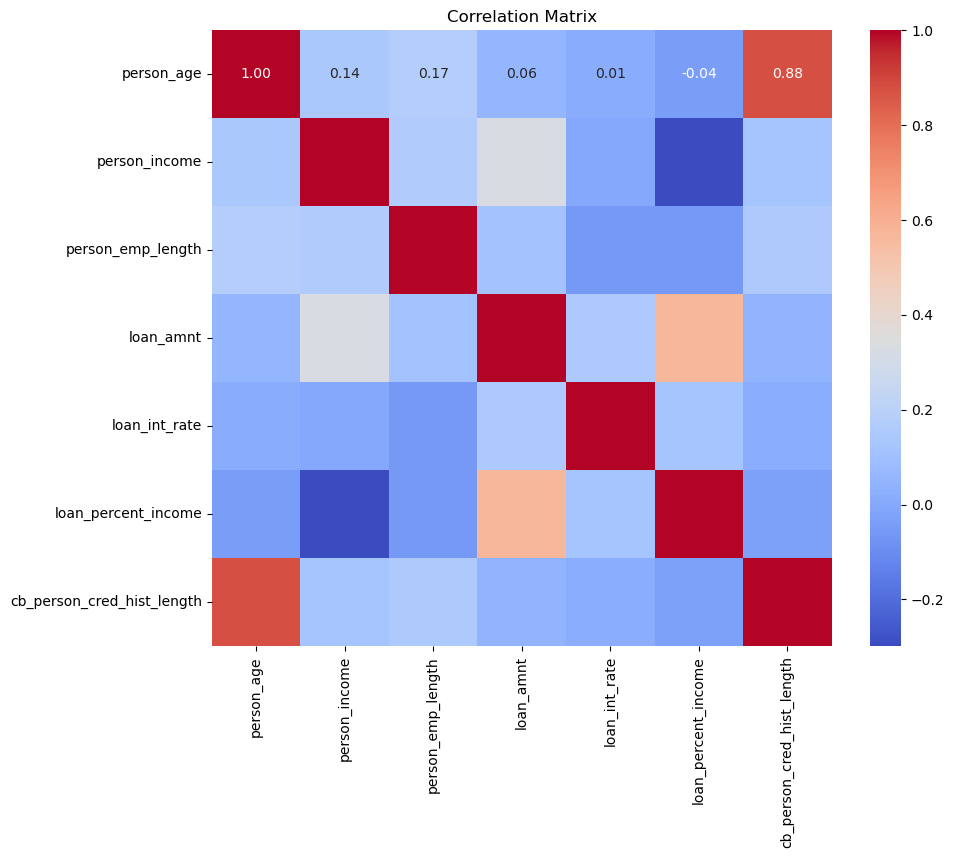

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Separate target variable and features
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [7]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train a logistic regression model
logreg = LogisticRegression(random_state=42,max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

In [9]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_logreg))


# Evaluate the model
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_logreg))

Confusion Matrix
[[4394  205]
 [ 542  751]]
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4599
           1       0.79      0.58      0.67      1293

    accuracy                           0.87      5892
   macro avg       0.84      0.77      0.79      5892
weighted avg       0.87      0.87      0.87      5892



In [10]:

# Set up the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [11]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluate the model
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix
[[4567   32]
 [ 370  923]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4599
           1       0.97      0.71      0.82      1293

    accuracy                           0.93      5892
   macro avg       0.95      0.85      0.89      5892
weighted avg       0.93      0.93      0.93      5892



In [12]:
import xgboost as xgb

# Set up the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [13]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_xgb))



print("\nXGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix
[[4566   33]
 [ 367  926]]

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4599
           1       0.97      0.72      0.82      1293

    accuracy                           0.93      5892
   macro avg       0.95      0.85      0.89      5892
weighted avg       0.93      0.93      0.93      5892



In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]


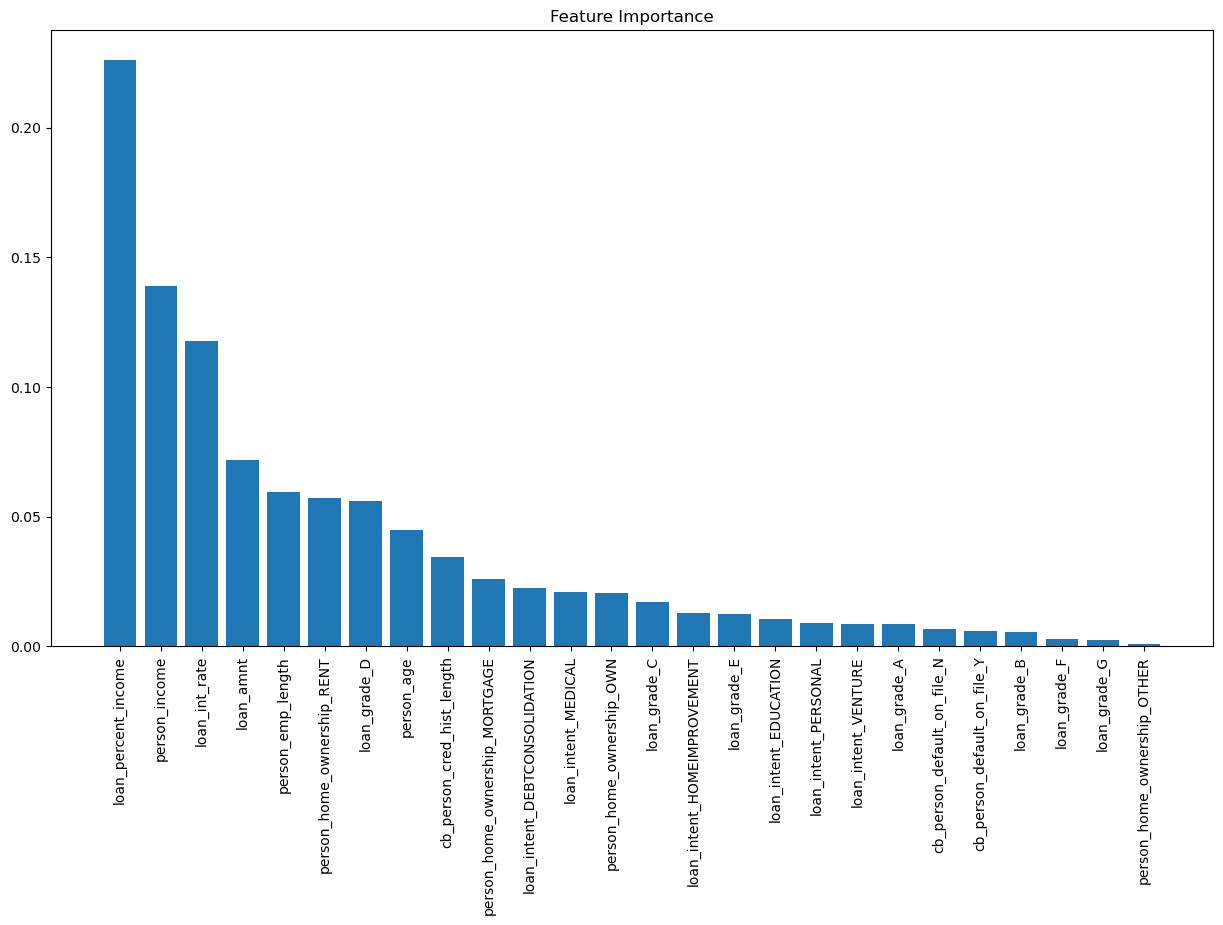

loan_percent_income: 22.63%
person_income: 13.88%
loan_int_rate: 11.77%
loan_amnt: 7.19%
person_emp_length: 5.96%
person_home_ownership_RENT: 5.71%
loan_grade_D: 5.62%
person_age: 4.48%
cb_person_cred_hist_length: 3.46%
person_home_ownership_MORTGAGE: 2.61%
loan_intent_DEBTCONSOLIDATION: 2.24%
loan_intent_MEDICAL: 2.09%
person_home_ownership_OWN: 2.05%
loan_grade_C: 1.71%
loan_intent_HOMEIMPROVEMENT: 1.28%
loan_grade_E: 1.26%
loan_intent_EDUCATION: 1.05%
loan_intent_PERSONAL: 0.90%
loan_intent_VENTURE: 0.86%
loan_grade_A: 0.85%
cb_person_default_on_file_N: 0.68%
cb_person_default_on_file_Y: 0.60%
loan_grade_B: 0.53%
loan_grade_F: 0.26%
loan_grade_G: 0.24%
person_home_ownership_OTHER: 0.09%


In [15]:
# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

# Display feature importances in percentage
for name, importance in zip(names, importances[indices]):
    print(f"{name}: {importance * 100:.2f}%")

In [23]:
### Ask user for input
person_age = int(input("Enter person's age: "))
person_income = float(input("Enter person's income: "))
loan_amnt = float(input("Enter loan amount: "))
loan_int_rate = float(input("Enter loan interest rate: "))
loan_percent_income = float(input("Enter loan percent of income: "))
person_emp_length = float(input("Enter person's employment length in years: "))
cb_person_cred_hist_length = int(input("Enter credit history length: "))
person_home_ownership_RENT = int(input("Enter 1 if the person is renting, else 0: "))
loan_grade_D = int(input("Enter 1 if the loan grade is D, else 0: "))
LGD = float(input('Enter LGD - '))

# Create user input dictionary
user_input = {
    'person_age': person_age,
    'person_income': person_income,
    'person_emp_length': person_emp_length,
    'loan_amnt': loan_amnt,
    'loan_int_rate': loan_int_rate,
    'loan_percent_income': loan_percent_income,
    'cb_person_cred_hist_length': cb_person_cred_hist_length,
    'person_home_ownership_MORTGAGE': 0,
    'person_home_ownership_OTHER': 0,
    'person_home_ownership_OWN': 0,
    'person_home_ownership_RENT': person_home_ownership_RENT,
    'loan_intent_DEBTCONSOLIDATION': 0,
    'loan_intent_EDUCATION': 0,
    'loan_intent_HOMEIMPROVEMENT': 0,
    'loan_intent_MEDICAL': 0,
    'loan_intent_PERSONAL': 0,
    'loan_intent_VENTURE': 0,
    'loan_grade_A': 0,
    'loan_grade_B': 0,
    'loan_grade_C': 0,
    'loan_grade_D': loan_grade_D,
    'loan_grade_E': 0,
    'loan_grade_F': 0,
    'loan_grade_G': 0,
    'cb_person_default_on_file_N': 0,
    'cb_person_default_on_file_Y': 0,
}



# Convert user input into a DataFrame for prediction
user_df = pd.DataFrame([user_input])

# Predict Probability of Default (PD)
user_df['PD'] = best_xgb.predict_proba(user_df)[:, 1]

# Calculate Exposure at Default (EAD)
user_df['EAD'] = user_df['loan_amnt']

# Calculate Expected Loss (EL)
user_df['EL'] = user_df['PD'] * user_df['EAD'] * LGD

# Display the result
print(user_df[['PD', 'EAD', 'EL']])

# Function to predict default
def predict_default(model, input_data):
    # Perform any necessary preprocessing here (if needed)
    input_df = pd.DataFrame([input_data])
    
    # Predict default status
    prediction = model.predict(input_df)
    
    return prediction[0]


# Use the best model for prediction
best_model = best_xgb  # Replace with your trained model, e.g., best_xgb
prediction = predict_default(best_model,  user_input)
print("\nDefault Prediction:", "Yes" if prediction == 1 else "No")


Enter person's age:  26
Enter person's income:  300000
Enter loan amount:  25000
Enter loan interest rate:  15.33
Enter loan percent of income:  0.08
Enter person's employment length in years:  0
Enter credit history length:  3
Enter 1 if the person is renting, else 0:  0
Enter 1 if the loan grade is D, else 0:  1
Enter LGD -  20


         PD      EAD             EL
0  0.445972  25000.0  222985.818982

Default Prediction: No


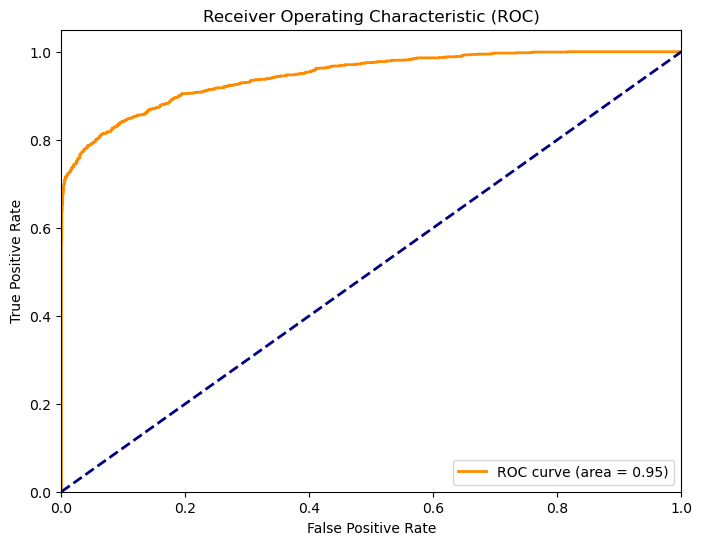

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [24]:
import joblib

# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgb_model_smote.pkl')

# Load the saved XGBoost model
loaded_model = joblib.load('best_xgb_model_smote.pkl')

# Predict on the test set with the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_loaded))

print("\nXGBoost Classification Report")
print(classification_report(y_test, y_pred_loaded))


Confusion Matrix
[[4566   33]
 [ 367  926]]

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4599
           1       0.97      0.72      0.82      1293

    accuracy                           0.93      5892
   macro avg       0.95      0.85      0.89      5892
weighted avg       0.93      0.93      0.93      5892

